In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
df = pd.read_csv("clean_data.csv")


In [130]:
df.head()

,id,screen_name,location,description,url,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Houston, TX""","""Rare and strong PokŽmon in Houston, TX. See m...","""https://t.co/dnWuDbFRkt""",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,"Templeville town, MD, USA",From late 2014 Socium Marketplace will make sh...,NaN,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,NaN,"Inspired by the smart, funny folks at @replyal...",https://t.co/P1e1o0m4KC,1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,NaN,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,"Dublin, United States",Inspiring cooks everywhere since 1956.,NaN,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


In [131]:
missing_vals = df.isnull().sum()
print(missing_vals)
missing = df.isnull().mean()
print(missing)

id                          0
screen_name                 0
location                  963
description               387
url                      1347
followers_count             0
friends_count               0
listed_count                0
created_at                  0
favourites_count            0
verified                    0
statuses_count              0
lang                        0
status                    325
default_profile             0
default_profile_image       0
name                        0
bot                         0
dtype: int64
id                       0.000000
screen_name              0.000000
location                 0.360404
description              0.144835
url                      0.504117
followers_count          0.000000
friends_count            0.000000
listed_count             0.000000
created_at               0.000000
favourites_count         0.000000
verified                 0.000000
statuses_count           0.000000
lang                     0.000000
statu

In [132]:
del df["location"]
del df["url"]

In [133]:
df.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1


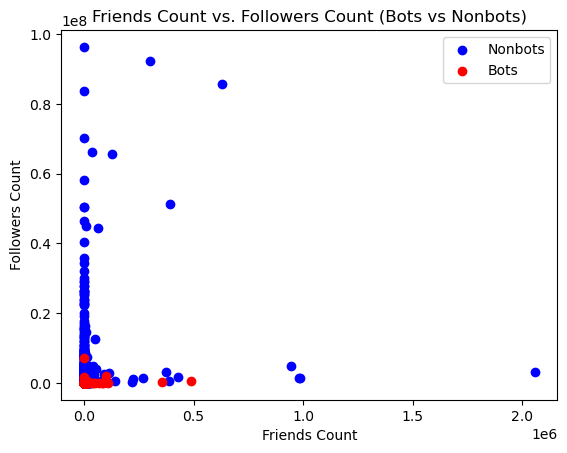

In [134]:
bots = df[df['bot'] == 1]
nonbots = df[df['bot'] == 0]

plt.scatter(nonbots['friends_count'], nonbots['followers_count'], color='blue', label='Nonbots')
plt.scatter(bots['friends_count'], bots['followers_count'], color='red', label='Bots')

plt.xlabel('Friends Count')
plt.ylabel('Followers Count')
plt.title('Friends Count vs. Followers Count (Bots vs Nonbots)')
plt.legend()

plt.show()

In [135]:
bag_of_words = ['bot', 'follow me', 'free', 'fake', 'virus', 'troll', 'clone', 'tweet me']

pattern = '|'.join(bag_of_words) 

df['screen_name_binary'] = df['screen_name'].str.contains(pattern, case=False, na=False)
df['name_binary'] = df['name'].str.contains(pattern, case=False, na=False)
df['description_binary'] = df['description'].str.contains(pattern, case=False, na=False)
df['status_binary'] = df['status'].str.contains(pattern, case=False, na=False)

df.head()

,id,screen_name,description,followers_count,friends_count,listed_count,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,name,bot,screen_name_binary,name_binary,description_binary,status_binary
0,8.160000e+17,"""HoustonPokeMap""","""Rare and strong PokŽmon in Houston, TX. See m...",1291,0,10,"""Mon Jan 02 02:25:26 +0000 2017""",0,False,78554,"""en""","{\n ""created_at"": ""Sun Mar 12 15:44:04 +0...",True,False,"""Houston PokŽ Alert""",1,False,False,False,False
1,4.843621e+09,kernyeahx,From late 2014 Socium Marketplace will make sh...,1,349,0,2/1/2016 7:37,38,False,31,en,NaN,True,False,Keri Nelson,1,False,False,False,False
2,4.303727e+09,mattlieberisbot,"Inspired by the smart, funny folks at @replyal...",1086,0,14,Fri Nov 20 18:53:22 +0000 2015,0,False,713,en,"{'retweeted': False, 'is_quote_status': False,...",True,False,Matt Lieber Is Bot,1,True,True,True,True
3,3.063139e+09,sc_papers,NaN,33,0,8,2/25/2015 20:11,0,False,676,en,Construction of human anti-tetanus single-chai...,True,True,single cell papers,1,False,False,False,False
4,2.955142e+09,lucarivera16,Inspiring cooks everywhere since 1956.,11,745,0,1/1/2015 17:44,146,False,185,en,NaN,False,False,lucarivera16,1,False,False,False,False


In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
df2 = df[['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count', 'bot']]
df2.head()

,friends_count,followers_count,screen_name_binary,name_binary,status_binary,verified,statuses_count,bot
0,0,1291,False,False,False,False,78554,1
1,349,1,False,False,False,False,31,1
2,0,1086,True,True,True,False,713,1
3,0,33,False,False,False,False,676,1
4,745,11,False,False,False,False,185,1


In [138]:
X = df2[['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']]
Y = df2[['bot']]

In [139]:
from sklearn.model_selection import train_test_split
XTrain,  XTest, YTrain, YTest = train_test_split(X,Y,test_size=0.3)

In [140]:
featureCols = ['friends_count', 'followers_count', 'screen_name_binary', 'name_binary', 'status_binary', 'verified', 'statuses_count']
X = df2[featureCols]
y = df2.bot

In [141]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(XTrain, YTrain)

DecisionTreeClassifier(criterion='entropy')

In [142]:
y_pred = clf.predict(X)
from sklearn.metrics import accuracy_score
print("Accuracy: " , accuracy_score(y, y_pred))


Accuracy:  0.9562125748502994


In [143]:
y_train_pred = clf.predict(XTrain)
y_test_pred = clf.predict(XTest)
print("Training Accuracy: ", accuracy_score(YTrain, y_train_pred))
print("Testing Accuracy: ", accuracy_score(YTest, y_test_pred))

Training Accuracy:  0.9994652406417113
Testing Accuracy:  0.8553615960099751


In [144]:

from sklearn.tree import export_text

print(export_text(clf, feature_names = featureCols))

|--- verified <= 0.50
|   |--- friends_count <= 46.50
|   |   |--- statuses_count <= 60.00
|   |   |   |--- followers_count <= 0.50
|   |   |   |   |--- statuses_count <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- statuses_count >  1.50
|   |   |   |   |   |--- statuses_count <= 12.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- statuses_count >  12.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- followers_count >  0.50
|   |   |   |   |--- friends_count <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- friends_count >  0.50
|   |   |   |   |   |--- followers_count <= 4.50
|   |   |   |   |   |   |--- statuses_count <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- statuses_count >  0.50
|   |   |   |   |   |   |   |--- statuses_count <= 15.00
|   |   |   |   |   |   |   |   |--- friends_count <= 4.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- friends_count

In [145]:
from sklearn.linear_model import LogisticRegression
lf = LogisticRegression()
lf.fit(XTrain, YTrain)

y_train_pred = lf.predict(XTrain)
y_test_pred = lf.predict(XTest)

# Calculate and print the training and testing accuracy
train_acc = accuracy_score(YTrain, y_train_pred)
test_acc = accuracy_score(YTest, y_test_pred)

print(f'Training Accuracy: {train_acc}')
print(f'Testing Accuracy: {test_acc}')

Training Accuracy: 0.7032085561497327
Testing Accuracy: 0.6820448877805486


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
#1.3 SAQ
#1. I couldn't determine a specific trend or pattern. As bots vs not bots share significant overlap it would make classification difficult.
#2. Training Accuracy:  0.9983957219251337 Testing Accuracy:  0.8541147132169576 The testing accuracy better represent the quality of the classifier 
# because it is running on data it hasn't seen before, a test. While the training data is seen more than once by the model. 
#3 The Decision Tree classifer is better as it has a higher testing accuracy. I say this because logistic regression is a weighted average and so it assumes the data is linear which it is not.

In [147]:
#4 a
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf1.fit(XTrain, YTrain)
# 4 b 
print(export_text(clf1, feature_names = featureCols))
y_pred = clf.predict(X)
from sklearn.metrics import accuracy_score
print("Accuracy: " , accuracy_score(y, y_pred))

y_train_pred = clf1.predict(XTrain)
y_test_pred = clf1.predict(XTest)
print("Training Accuracy: ", accuracy_score(YTrain, y_train_pred))
print("Testing Accuracy: ", accuracy_score(YTest, y_test_pred))
#------- for Q 4c)
print("YTrain Bots % ",  YTrain['bot'].sum()/ len(YTrain))
print("YTest Bots % ",  YTest['bot'].sum()/ len(YTrain))

|--- verified <= 0.50
|   |--- friends_count <= 46.50
|   |   |--- class: 1
|   |--- friends_count >  46.50
|   |   |--- class: 0
|--- verified >  0.50
|   |--- friends_count <= 13643.00
|   |   |--- class: 0
|   |--- friends_count >  13643.00
|   |   |--- class: 0

Accuracy:  0.9562125748502994
Training Accuracy:  0.7909090909090909
Testing Accuracy:  0.7817955112219451
YTrain Bots %  0.45133689839572194
YTest Bots %  0.20962566844919786


# 4b
# It basically says that if you have less than 39 friends then you are verified. It classifies users being bots or not based on the number of friends_count more than 40 and followers_count less than 13 and then checks if its verified. 

4 c)
THe classifer thinks that friendcount and then followers_count are (in order) the most important features.
5)
YTrain Bots %  0.46203208556149733
YTest Bots %  0.19893048128342247

If you had a different dataset where only 10% of the rows were bots, would 85% accuracy be good?
There is 15% error which is greater than the percentage of bots so the outcome would range wildly. It would pick up all the non bots but would have enough data to learn what a bot looks like.
6)
A problem with this is that we don't randomize the data when splitting as it could all be bots in the testing data. To improve this we could randomize the data when splitting.
7)
- The test training split
- which features are selected
- type of models to use
- gave us a bag of words to detect bot usernames
- standard for removing Data Processing

In [149]:
#Part 2 
import random as rand
import pandas as pd

X1 = [rand.random() for x in range(1000)]
X2 = [rand.random() for x in range(1000)]
#X1 & X2 r RV 
Y = [1 if X1 + X2 > 1 else 0 for X1, X2 in zip(X1, X2)]
#create df w x1 x2 Y
df3 = pd.DataFrame(data={'X1': X1, 'X2': X2, 'Y': Y})

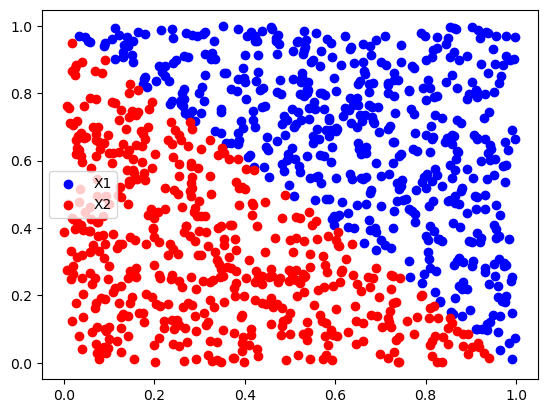

In [150]:
ones=df3[df3['Y']==1]
zeros=df3[df3['Y']==0]

plt.scatter(ones['X1'], ones['X2'], color='blue', label='X1')
plt.scatter(zeros['X1'], zeros['X2'],color='red', label='X2')

plt.legend()

plt.show()

In [151]:
feat = ['X1', 'X2']
x = df3[feat]
y = df3['Y']
XTrain,  XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3)
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf1.fit(XTrain, YTrain)

y_train_pred = clf1.predict(XTrain)
y_test_pred = clf1.predict(XTest)
print("Training Accuracy: ", accuracy_score(YTrain, y_train_pred))
print("Testing Accuracy: ", accuracy_score(YTest, y_test_pred))
##99% creating a line 

Training Accuracy:  0.8857142857142857
Testing Accuracy:  0.8666666666666667


In [152]:
from sklearn.linear_model import LogisticRegression
lf = LogisticRegression()
lf.fit(XTrain, YTrain)

y_train_pred = lf.predict(XTrain)
y_test_pred = lf.predict(XTest)

# Calculate and print the training and testing accuracy
train_acc = accuracy_score(YTrain, y_train_pred)
test_acc = accuracy_score(YTest, y_test_pred)

print(f'Training Accuracy: {train_acc}')
print(f'Testing Accuracy: {test_acc}')

Training Accuracy: 0.99
Testing Accuracy: 0.9866666666666667


2.2
1)
I expected the logistic regression to get 100% because Y is designed so that Y is 1 if either input is 1. Y depends linearly on the sum of X1 + X2. So the logistic regresssion sees a linear relationship.
2)
Training Accuracy:  0.8671428571428571
Testing Accuracy:  0.87
3)
Training Accuracy:  1.0
Testing Accuracy:  0.9633333333333334
4)
In Step 4, a Decision Tree with no depth limit can achieve near-perfect accuracy because it recursively splits the data into very specific regions, perfectly matching the X1 + X2 >1 boundary. This allows it to memorize the dataset, overfitting to the training data. It causes high accuracy on the training set but it lowers accuracy on new data thats why testing accuracy was 96%. 

In [154]:
feat = ['X1', 'X2']
x = df3[feat]
y = df3['Y']
XTrain,  XTest, YTrain, YTest = train_test_split(x, y, test_size=0.3)
clf1 = DecisionTreeClassifier(criterion='entropy')
clf1.fit(XTrain, YTrain)

y_train_pred = clf1.predict(XTrain)
y_test_pred = clf1.predict(XTest)
print("Training Accuracy: ", accuracy_score(YTrain, y_train_pred))
print("Testing Accuracy: ", accuracy_score(YTest, y_test_pred))
##99% creating a line 

Training Accuracy:  1.0
Testing Accuracy:  0.9733333333333334
